# Case 1. Heart Disease
### Elena Mylläri
07.02.2021<br>
Neural Network for Health Technology Applications<br>
Metropolia University of Applied Sciences

## Predicting the heart disease

The perpose of this project is to create and train a dense neural network to predict to classify the presence of heart disease based on 13 parameters. 

### Setup

In [326]:
# Import libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dropout


### Dataset

The model will use the processed [Clevelend dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/).

#### Attribute Information:

* age
> age in years
* sex  
> sex (1 = male; 0 = female)
* cp   
> chest pain type
        * Value 1: typical angina
        * Value 2: atypical angina
        * Value 3: non-anginal pain
        * Value 4: asymptomatic
* trestbps
> resting blood pressure (in mm Hg on admission to the hospital)
* chol   
> serum cholestoral in mg/dl
* fbs    
> fasting blood sugar > 120 mg/dl  
        * 1 = true 
        * 0 = false
* restecg
> resting electrocardiographic results
        * Value 0: normal
        * Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
                    elevation or depression of > 0.05 mV)
        * Value 2: showing probable or definite left ventricular hypertrophy
                    by Estes' criteria
* thalach  
> maximum heart rate achieved
* exang    
> exercise induced angina 
        * 1 = yes
        * 0 = no
* oldpeak 
> ST depression induced by exercise relative to rest
* slope 
> the slope of the peak exercise ST segment
       * Value 1: upsloping
       * Value 2: flat
       * Value 3: downsloping
* ca  
> number of major vessels (0-3) colored by flourosopy
* thal      
> 3 = normal; 6 = fixed defect; 7 = reversable defect
* num       (the predicted attribute, "diagnose" in the  experiment)

In [282]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", sep = ",",
                 names=["age", "sex","cp","trestbps","chol","fbs","restecg", "thalach", "exang", "oldpeak", "slope", 
                        "ca", "thal", "diagnose"], header=None)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnose
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


Check if there are values missing.

In [283]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
diagnose    0
dtype: int64

Get the statistics

In [284]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


### Preprocessing the data

Unique values in diagnose column:

In [285]:
df.diagnose.unique()

array([0, 2, 1, 3, 4], dtype=int64)

This is binary classification problem (sick/not sick), so there is a need to change the values of the Diagnoses column: 0 - not sich, >0 - sick.

In [286]:
df.diagnose = 1*(df.diagnose > 0)
df.diagnose.unique()

array([0, 1])

Check if there are only the appropriate values in columns cp (1-4), restecg (0-2), slope (1-3), thal (3,6,7), ca(0-3)

In [287]:
print(df.cp.value_counts())
print(df.restecg.value_counts())
print(df.slope.value_counts())
print(df.thal.value_counts())
print(df.ca.value_counts())


4.0    144
3.0     86
2.0     50
1.0     23
Name: cp, dtype: int64
0.0    151
2.0    148
1.0      4
Name: restecg, dtype: int64
1.0    142
2.0    140
3.0     21
Name: slope, dtype: int64
3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64
0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64


In thal and ca column there are "?" values. Replace them with the median of the column values. <br>
Option 1: find the indices of the "?" values and replace them:

In [288]:
# returns -1 if not found
questions= df["thal"].str.find("?") 
  
#keep only the indeces where "?", so we need only the indices of the 0 values
questions[questions!=-1]

#check that indices are rigth
print(df['thal'][87])
print(df['thal'][266])

?
?


From the unique value counts we can find the median value of thal column: 303:2 = 151.5, so it's value 3.0 (there are 166 of them)

In [292]:
# change the "?" to the median value 3
df.loc[87,'thal'] = '3.0'
df.loc[266,'thal'] = '3.0'
print(df['thal'][87])
print(df['thal'][266])

3.0
3.0


The median value of ca column: 303:2 = 151.5, so it's value 0.0 (there are 176 of them).
Option 2 of changing values: using np.where.

In [293]:
df.ca = np.where(df.ca=="?", "0.0", df.ca)
df.ca.value_counts()

0.0    180
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64

Recoding of categorical data in columns 'cp' 'restecg' 'slope' 'thal'

In [295]:
oneHotKeys = np.array(['cp', 'restecg', 'slope', 'thal'])

# Make new columns with only 0 and 1 and drop the original ones
for key in oneHotKeys:
    df = pd.concat([df,pd.get_dummies(df[key], prefix=key)], axis=1)
    df = df.drop(columns=key)
print(df.columns)

['cp' 'restecg' 'slope' 'thal']
Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'ca', 'diagnose', 'cp_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'restecg_0.0',
       'restecg_1.0', 'restecg_2.0', 'slope_1.0', 'slope_2.0', 'slope_3.0',
       'thal_3.0', 'thal_6.0', 'thal_7.0'],
      dtype='object')


Change the types of the columns with values 0 and 1 to categorical and ca-column from object to float.

In [296]:
cat_columns = (['sex', 'fbs', 'exang', 
        'diagnose', 'cp_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'restecg_0.0',
       'restecg_1.0', 'restecg_2.0', 'slope_1.0', 'slope_2.0', 'slope_3.0',
       'thal_3.0', 'thal_6.0', 'thal_7.0'])
for column in cat_columns:
    df[column] = df[column].astype(pd.api.types.CategoricalDtype(ordered=False))

df.ca = df.ca.astype(float)

Final check of the datatypes

In [297]:
df.dtypes

age             float64
sex            category
trestbps        float64
chol            float64
fbs            category
thalach         float64
exang          category
oldpeak         float64
ca              float64
diagnose       category
cp_1.0         category
cp_2.0         category
cp_3.0         category
cp_4.0         category
restecg_0.0    category
restecg_1.0    category
restecg_2.0    category
slope_1.0      category
slope_2.0      category
slope_3.0      category
thal_3.0       category
thal_6.0       category
thal_7.0       category
dtype: object

Split the dataset into training and test and separate the features and the labels.

In [231]:
train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)
# Separate the features and labels
train_features = train_dataset.copy()
test_features = test_dataset.copy()
# pop takes the lables 
train_labels = train_features.pop('diagnose')
test_labels = test_features.pop('diagnose')

Normilize the features

In [299]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_features))

### Modelling

Before the architecture was chosen, there were experiments with the number of hidden layers (1-3), with using and not using the drop out and with the number of parameters.
Here are some example of architectures and the values of loss and accuracy when using them:

In [447]:

exp_data = {'1': [1, 0, '9',0.0628, 0.5059, 0.9896, 0.7347], 
            '2': [2, 0, '9-5',0.0437, 0.7815, 0.9948, 0.7959],
           '3': [3, 0, '15-10-5',0.0406, 0.7845, 0.9896, 0.8163],
           '4': [2, 0, '10-3',0.0013, 1.5481, 1.000, 0.7755],
           '5': [5, 3, '0.2-10-0.2-3-0.2',0.2321, 0.3855, 0.9067, 0.8571],
           '6': [3, 2, '0.2-9-0.2',0.2769, 0.4385, 0.8808, 0.7755]}
pd.DataFrame.from_dict(exp_data, orient='index',columns=['num of hidden layers incl dropout', 'number of drop_out layers','num of params in hidden layers/drop_ot %', 'loss', 'val_loss', 'accuracy', 'val_accuracy'])

,num of hidden layers incl dropout,number of drop_out layers,num of params in hidden layers/drop_ot %,loss,val_loss,accuracy,val_accuracy
1,1,0,9,0.0628,0.5059,0.9896,0.7347
2,2,0,9-5,0.0437,0.7815,0.9948,0.7959
3,3,0,15-10-5,0.0406,0.7845,0.9896,0.8163
4,2,0,10-3,0.0013,1.5481,1.0000,0.7755
5,5,3,0.2-10-0.2-3-0.2,0.2321,0.3855,0.9067,0.8571
6,3,2,0.2-9-0.2,0.2769,0.4385,0.8808,0.7755


The final model architecture is the following:

1. the normalization layer (normalizer) 
2. Drop_out 0.2
3. a Dense layer having 10 elements, activation function of 'relu'
4. Drop_out 0.2
5. a Dense layer having 3 elements and activation function of 'relu'
6. Drop_out 0.2
7. a Dense layer having 1 element

Selected loss: BinaryCrossentropy, which is used when there are only two label classes for prediction (0/1) and computes the cross-entropy loss between true labels and predicted labels.

Selected metrics: BinaryAccuracy, which calculates how often predictions match binary labels. There's also a confusion matrix of the model evaluation results.

Selected optimizer : Adam, which is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.

In [444]:
FEATURES = len(train_features.columns)

In [622]:
model = Sequential()
model.add(normalizer),
model.add(Dense(FEATURES, activation='relu', name = "input", input_shape=(train_dataset.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'relu', name = "hidden1"))
model.add(Dropout(0.2))
model.add(Dense(3, activation = 'relu', name = "hidden2"))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid', name = "output"))

model.compile(loss=losses.BinaryCrossentropy(),
              optimizer='adam',
              metrics=tf.metrics.BinaryAccuracy())

model.summary()

Model: "sequential_66"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_15 (Normalizat (None, 22)                45        
_________________________________________________________________
input (Dense)                (None, 22)                506       
_________________________________________________________________
dropout_88 (Dropout)         (None, 22)                0         
_________________________________________________________________
hidden1 (Dense)              (None, 10)                230       
_________________________________________________________________
dropout_89 (Dropout)         (None, 10)                0         
_________________________________________________________________
hidden2 (Dense)              (None, 3)                 33        
_________________________________________________________________
dropout_90 (Dropout)         (None, 3)               

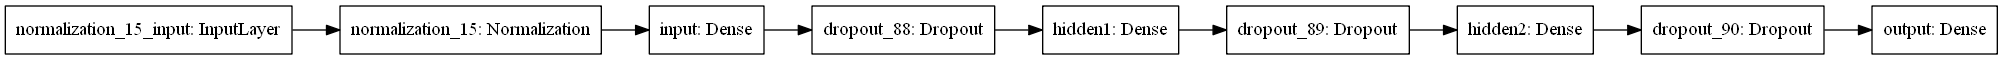

In [628]:
plot_model(model, show_shapes = False, show_layer_names = True, rankdir = 'LR') 

### Training

Here are some of the tested values of epochs number and batch size:

In [ ]:
exp_data = {'1': [50, 5, 0.2007,0.9585,0.7220,0.7755], 
            '2': [20, 5, 0.2007,0.9275,0.6256,0.7755],
           '3': [50, 3, 0.2338,0.8964,0.5083, 0.7959],
           '4': [10, 3, 0.3283,0.8290,0.4063,0.8163],
           '5': [10, 10, 0.3987,0.7876,0.3804, 0.8367],
           '6': [30, 3,0.4075,0.8083,0.3585,0.8367],
           '7': [30, 10,0.3568,0.8290,0.3595,0.8571]}
pd.DataFrame.from_dict(exp_data, orient='index',columns=['num of epochs', 'batch_size', 'loss',  'accuracy', 'val_loss', 'val_accuracy'])

For the final training 25 epochs and batch size 10 were used:

In [623]:
%%time
h = model.fit(train_features, train_labels,
                   epochs = 25,
                   verbose = 0,
                   batch_size=10,
                   validation_split = 0.2)

Wall time: 3.86 s


### Evaluation and perfomance

In [603]:
h_dict = h.history
h_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

#### Plot the training and validation loss

In [604]:
def plot_loss(h):
    
    plt.plot(h.history['loss'], label='train')
    plt.plot(h.history['val_loss'], label='validation')
    plt.title('Training loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

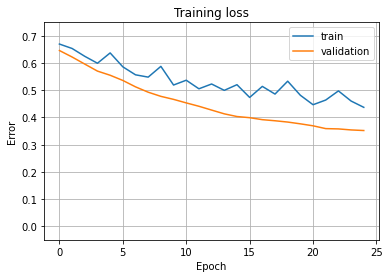

In [624]:
plot_loss(h)
plt.ylim(-0.05, 0.75);

The loss is going down all time, maybe it could be better to use a bigger amount of epochs. 

#### Plot the training and validation accuracy

In [611]:
def plot_accuracy(h):
    
    plt.plot(h.history['binary_accuracy'], label='train')
    plt.plot(h.history['val_binary_accuracy'], label='validation')
    plt.title('Training accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

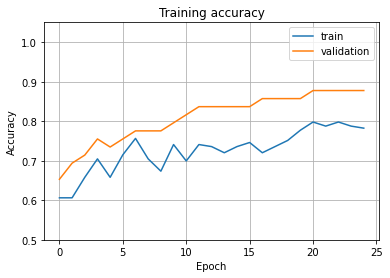

In [625]:
plot_accuracy(h)
plt.ylim(0.5, 1.05);

The accuracy is getting better, there are places, where it stays the same. there is a chance that this model stopped at a local maxmim and if there were more epochs, the result could be even better.

#### Evaluate the performance

In [626]:
%%time
test_results = model.evaluate(test_features, test_labels, verbose=0)
test_results

Wall time: 197 ms


[0.33467453718185425, 0.8852459192276001]

In [627]:
print("Test results (error):    {:.3f}".format(test_results[0]))
print("Test results (accuracy): {:.3f}".format(test_results[1]))

Test results (error):    0.335
Test results (accuracy): 0.885


Display the confusion matrix

In [631]:
from sklearn.metrics import confusion_matrix
predictions = (model.predict(test_features) >0.5)
confusion_matrix(test_labels, predictions)

array([[31,  3],
       [ 4, 23]], dtype=int64)

### Conclusions 

### The model
The final model architecture is: 
1. the normalization layer (normalizer) 
2. Drop_out 0.2
3. a Dense layer having 10 elements, activation function of 'relu'
4. Drop_out 0.2
5. a Dense layer having 3 elements and activation function of 'relu'
6. Drop_out 0.2
7. a Dense layer having 1 element

It uses Adam-optimizer, BinaryCrossentropy loss and BinaryAccuracy metrics.<br>
The amount of epochs is 25 and batch size is 10. <br>
The accuracy with the test dataset is 0.885, which shows that using this model one can quite surely predict if a person has a heart disease or not from his/hers analyzes and tests results.  <br>

### Observations
* Most of my difficulties were connected to the dataset. Somehow I was still a bit confused with the types of the data needed for the model to work. 
* Deciding the amount of layers and the amount params in them is hard. I chose "keep it simple" way in the beginning but there are still 5 hidden layers in the final model. 
* It is always possible to improve a model, so this one could be optimized too if you try enough of different cominations: change the amount of params in layers, the amount of layers and the amount of epochs.
* There some results from the late 80's of usage of the datasets for predicting in the file with the information about the dataset. The best one there is 81%. So at least my model works better than the models/algorithms built 30 years ago. 